In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas import json_normalize

In [2]:
df=pd.read_excel('sales_data_sample.xls')
df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
# Convert the DataFrame to a JSON file
df.to_json('csvjson.json', orient='records', lines=True)


In [4]:
# Read JSON file line-by-line, assuming JSON Lines format
file_path = 'csvjson.json'

json_data = []
with open(file_path, 'r') as f:
    for line in f:
        json_data.append(json.loads(line.strip()))  # Load each line as a JSON object

# Convert list of JSON objects into a DataFrame
dt = json_normalize(json_data)

In [5]:
df.dropna(inplace=True)
df.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
ADDRESSLINE2        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
TERRITORY           0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

In [6]:
dt.dropna(inplace=True)
dt.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
ADDRESSLINE2        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
TERRITORY           0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

In [7]:
combined_data = pd.concat([df,dt],ignore_index=True)
combined_data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10223,37,100.00,1,3965.66,2/20/2004 0:00,Shipped,1,2,2004,...,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium
1,10361,20,72.55,13,1451.00,12/17/2004 0:00,Shipped,4,12,2004,...,"Monitor Money Building, 815 Pacific Hwy",Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Small
2,10270,21,100.00,9,4905.39,7/19/2004 0:00,Shipped,3,7,2004,...,"Monitor Money Building, 815 Pacific Hwy",Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Medium
3,10347,30,100.00,1,3944.70,11/29/2004 0:00,Shipped,4,11,2004,...,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium
4,10391,24,100.00,4,2416.56,3/9/2005 0:00,Shipped,1,3,2005,...,201 Miller Street,Level 15,North Sydney,NSW,2060,Australia,APAC,O'Hara,Anna,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,10120,43,76.00,14,3268.00,4/29/2003 0:00,Shipped,2,4,2003,...,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium
290,10223,26,67.20,15,1747.20,2/20/2004 0:00,Shipped,1,2,2004,...,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Small
291,10361,44,100.00,10,5001.92,12/17/2004 0:00,Shipped,4,12,2004,...,"Monitor Money Building, 815 Pacific Hwy",Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Medium
292,10361,35,100.00,11,4277.35,12/17/2004 0:00,Shipped,4,12,2004,...,"Monitor Money Building, 815 Pacific Hwy",Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Medium


In [8]:
total_sales = combined_data['SALES'].sum()
average_order_value = combined_data['SALES'].mean()
print("Total Sales:", total_sales)
print("Average Order Value:", average_order_value)

Total Sales: 1013125.04
Average Order Value: 3446.003537414966


In [9]:
combined_data['sales_category'] = np.where(combined_data['SALES'] > 3000, 'High', 'Low')
category_distribution = combined_data['sales_category'].value_counts()


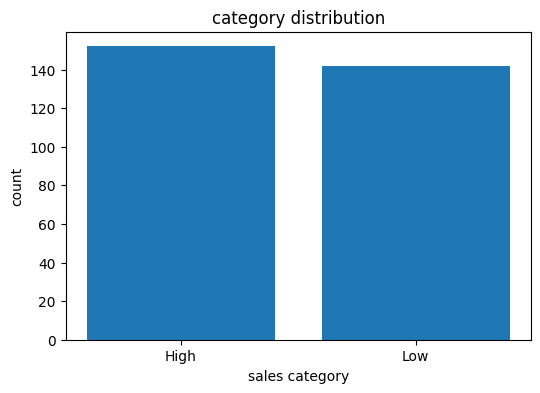

In [10]:
plt.figure(figsize=(6,4))
plt.bar(category_distribution.index,category_distribution.values)
plt.xlabel('sales category')
plt.ylabel('count')
plt.title('category distribution')
plt.show()

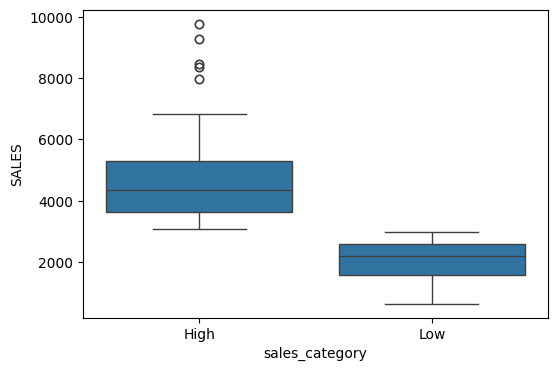

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(data=combined_data,x='sales_category',y='SALES')
plt.show()

In [12]:
Q1 = combined_data['SALES'].quantile(0.25)
Q3 = combined_data['SALES'].quantile(0.75)
IQR = Q3 - Q1

In [13]:
# Filter out the outliers
filtered_data = combined_data[(combined_data['SALES'] >= (Q1 - 1.5 * IQR)) & (combined_data['SALES'] <= (Q3 + 1.5 * IQR))]


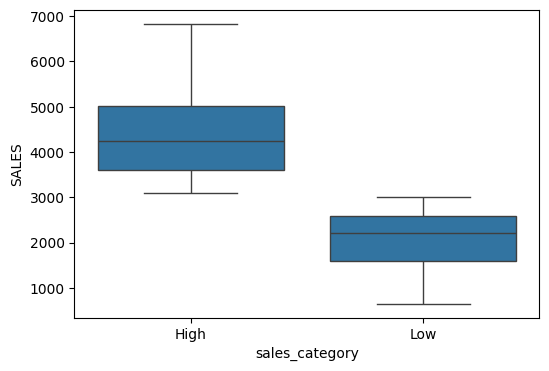

In [14]:
# Plot the boxplot with the filtered data
plt.figure(figsize=(6,4))
sns.boxplot(data=filtered_data, x='sales_category', y='SALES')
plt.show()